In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests as req
import datetime
import calendar

In [2]:
def lastday(year):
    L=[]
    limit = datetime.datetime.now().year-year
    for i in range(limit+1):
        for month in range(12):
            if i==limit and datetime.datetime.now().month-month-1==0:
                return L
            else:
                rg = calendar.monthrange(year+i,month+1)
                if month+1<10:
                    L.append(str(year+i)+'/0'+str(month+1)+'/'+str(rg[1]))
                else:
                    L.append(str(year+i)+'/'+str(month+1)+'/'+str(rg[1]))
    return L

In [5]:
def collect_client(year):
    
    year_list = lastday(year)
    
    L=[]
    
    for i in year_list:
        
        try:

            URL = 'https://websys.fsit.com.tw/FubonETF/Trade/Pcf.aspx?stock=00692&date='+i

            s = req.get(URL)

            context = BeautifulSoup(s.text,'html.parser')

            L.append(context.find_all('td')[16].string.strip())
        
        except:
            
            pass
        
    return pd.DataFrame({'受益人數':L},index = year_list)

In [54]:
result = collect_client(2017)

In [55]:
for i in range(len(result['受益人數'])):
    result['受益人數'][i] = pd.to_numeric(result['受益人數'][i].replace(',',''))
result

,受益人數
2017/01/31,46617
2017/02/28,46617
2017/03/31,46617
2017/04/30,46617
2017/05/31,6250
2017/06/30,7457
2017/07/31,7671
2017/08/31,8060
2017/09/30,8256
2017/10/31,7997


<IPython.core.display.Javascript object>


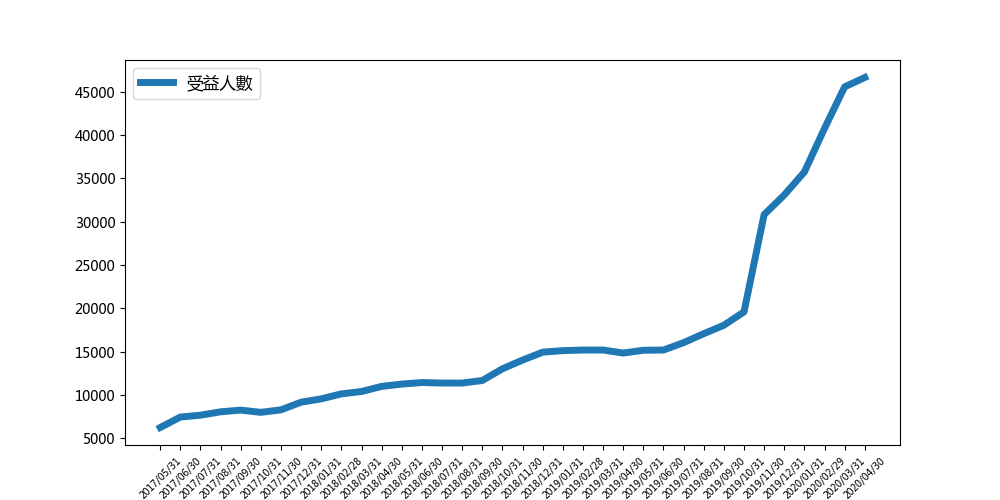

In [63]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(10,5))
plt.xticks(fontsize=7,rotation=45)
plt.yticks(fontsize=10)
plt.plot(result.index[4:],result['受益人數'][4:],linewidth = 5,label='受益人數')
plt.legend(loc='upper left',prop = {'size':12})
plt.show()